In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Step 1: Load the data
data = pd.read_csv('./dataset/Disease_symptom_and_patient_profile_dataset.csv')

# Step 2: One-Hot Encoding
# We need to one-hot encode all categorical variables, so let's identify them first
categorical_vars = ['Disease', 'Fever', 'Cough', 'Fatigue', 'Difficulty Breathing', 'Gender', 'Blood Pressure', 'Cholesterol Level', 'Outcome Variable']
encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(data[categorical_vars]).toarray()



In [14]:
import pandas as pd

# Load the dataset
file_path = './dataset/Disease_symptom_and_patient_profile_dataset.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset and the columns to understand the structure
data.head(), data.columns

# Attempt to reload the dataset and display its columns and first few rows again
try:
    data = pd.read_csv(file_path)
    display_info = (data.head(), data.columns)
except Exception as e:
    display_info = str(e)

display_info

# Remove columns related to personal data
cleaned_data = data.drop(columns=['Age', 'Gender', 'Blood Pressure', 'Cholesterol Level','Outcome Variable'])

# Show the cleaned data to verify the columns are removed
cleaned_data.head()

# Save the cleaned data to a new CSV file
cleaned_file_path = './dataset/cleaned_disease_symptom_data.csv'
cleaned_data.to_csv(cleaned_file_path, index=False)

In [23]:
import pandas as pd

# 假设你已经加载了数据到 DataFrame 中
data = pd.read_csv('./dataset/cleaned_disease_symptom_data.csv')

# 初始时疾病和症状的字典为空
disease_symptoms = {}

# 遍历每行数据，按疾病收集症状
for index, row in data.iterrows():
    disease = row['Disease']
    # 初始化疾病的症状集合（使用集合避免重复）
    if disease not in disease_symptoms:
        disease_symptoms[disease] = set()

    # 检查每个症状列
    for symptom in ['Fever', 'Cough', 'Fatigue', 'Difficulty Breathing']:
        if row[symptom] == 'Yes':  # 只有当症状为"Yes"时，才添加到集合
            disease_symptoms[disease].add(symptom)

# 将疾病和症状字典转换为需要的 DataFrame 格式
result_list = [{'Disease': k, 'Symptoms': str(list(v))} for k, v in disease_symptoms.items()]
result_data = pd.DataFrame(result_list)

# 保存到 CSV 文件
result_data.to_csv('./datset/formatted_disease_symptom_data.csv', index=False, quoting=1)  # 确保字符串正确引用

print("Data saved to 'formatted_disease_symptom_data.csv'")

Data saved to 'formatted_disease_symptom_data.csv'


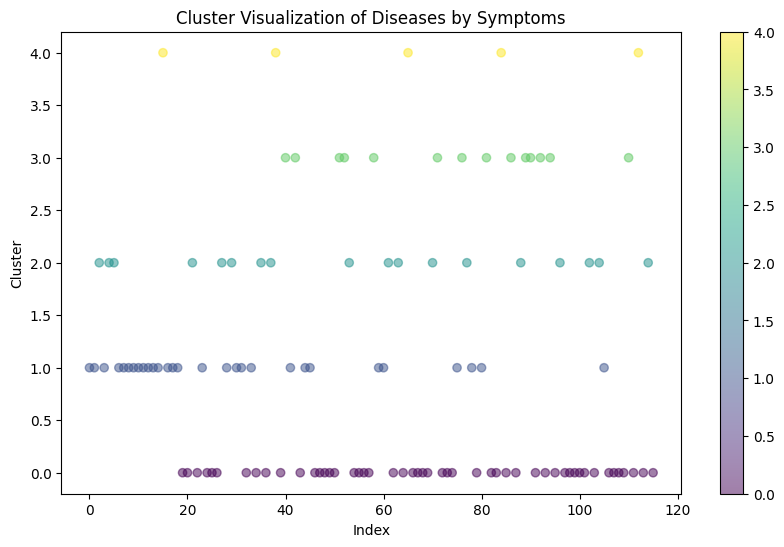

In [28]:
# 绘制2D聚类可视化图
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import MultiLabelBinarizer

# 加载数据
data = pd.read_csv('./dataset/formatted_disease_symptom_data.csv')

# 解析症状列表
data['Symptoms'] = data['Symptoms'].apply(lambda x: eval(x))

# 将症状列表转换为独热编码
mlb = MultiLabelBinarizer()
symptoms_encoded = mlb.fit_transform(data['Symptoms'])
symptoms_df = pd.DataFrame(symptoms_encoded, columns=mlb.classes_)

# 应用 K-means 聚类算法
kmeans = KMeans(n_clusters=5, random_state=42)  # 可以根据实际情况调整聚类的数量
clusters = kmeans.fit_predict(symptoms_df)
data['Cluster'] = clusters

# 可视化聚类结果
plt.figure(figsize=(10, 6))
plt.scatter(data.index, data['Cluster'], c=data['Cluster'], cmap='viridis', alpha=0.5)
plt.title('Cluster Visualization of Diseases by Symptoms')
plt.xlabel('Index')
plt.ylabel('Cluster')
plt.colorbar()
plt.show()

# 保存聚类结果
data.to_csv('./dataset/clustered_disease_symptom_data.csv', index=False)
print("Clustered data saved to 'clustered_disease_symptom_data.csv'")

In [39]:
# 基于聚类结果分组，并获取每个聚类中的病症名称
grouped_diseases = data.groupby('Cluster')['Disease'].apply(list)

# 输出每个聚类中的病症列表
for cluster_id, diseases in grouped_diseases.items():
    print(f"Cluster {cluster_id}:")
    for disease in diseases:
        print(f"- {disease}")
    print()  # 添加空行以便于阅读


Cluster 0:
- Muscular Dystrophy
- Sinusitis
- Bipolar Disorder
- Cerebral Palsy
- Colorectal Cancer
- Hypertensive Heart Disease
- Atherosclerosis
- Epilepsy
- Obsessive-Compulsive Disorde...
- Cirrhosis
- Spina Bifida
- Klinefelter Syndrome
- Acne
- Brain Tumor
- Cystic Fibrosis
- Glaucoma
- Eating Disorders (Anorexia,...
- Fibromyalgia
- Hemophilia
- Hypoglycemia
- Autism Spectrum Disorder (ASD)
- Hyperglycemia
- Ovarian Cancer
- Turner Syndrome
- Zika Virus
- Cataracts
- Sickle Cell Anemia
- Tetanus
- Anemia
- Down Syndrome
- Pancreatic Cancer
- Pneumothorax
- Esophageal Cancer
- Marfan Syndrome
- Systemic Lupus Erythematosus...
- Breast Cancer
- Osteomyelitis
- Chronic Kidney Disease
- Hepatitis B
- Prader-Willi Syndrome
- Thyroid Cancer
- Bladder Cancer
- Tourette Syndrome
- Dementia
- Diverticulitis
- Mumps
- Cholecystitis
- Schizophrenia
- Testicular Cancer
- Williams Syndrome

Cluster 1:
- Influenza
- Common Cold
- Asthma
- Anxiety Disorders
- Diabetes
- Gastroenteritis
- Pancr

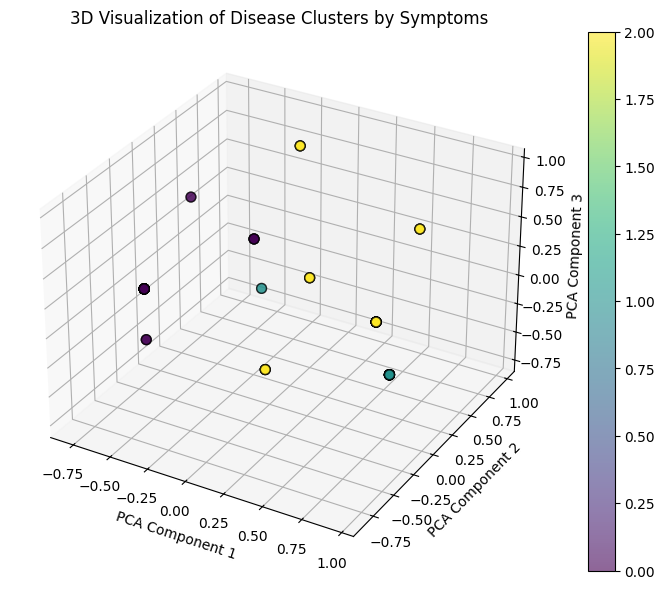

In [35]:
# 绘制3D聚类可视化图
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# 加载数据
data = pd.read_csv('./dataset/clustered_disease_symptom_data.csv')

# 解析字符串表示的列表
data['Symptoms'] = data['Symptoms'].apply(eval)

# 使用 MultiLabelBinarizer 进行独热编码
mlb = MultiLabelBinarizer()
symptoms_encoded = mlb.fit_transform(data['Symptoms'])
symptoms_df = pd.DataFrame(symptoms_encoded, columns=mlb.classes_)

# 使用 PCA 降维到 3 维
pca = PCA(n_components=3)
reduced_data = pca.fit_transform(symptoms_df)

# 使用 K-Means 进行聚类
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(reduced_data)

# 创建 3D 散点图
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(reduced_data[:, 0], reduced_data[:, 1], reduced_data[:, 2], c=clusters, cmap='viridis', edgecolor='k', s=50, alpha=0.6)
ax.set_title('3D Visualization of Disease Clusters by Symptoms')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
plt.colorbar(scatter)

plt.show()
